<a href="https://colab.research.google.com/github/Mayank300/PROJECT-113/blob/main/PROJECT_113.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the important modules

In [ ]:
import pandas as pd
import statistics
import plotly.express as px

Now let's visualise the data to see if we can find anything?

In [ ]:
#Plotting the graph
df = pd.read_csv("https://raw.githubusercontent.com/whitehatjr/datasets/master/savings_data.csv")
fig = px.scatter(df, y="quant_saved")
fig.show()

In [ ]:
import csv

with open('savings_data.csv', newline="") as f:
  reader = csv.reader(f)
  savings_data = list(reader)

savings_data.pop(0)

#Finding total number of people and number of people who were reminded
total_entries = len(savings_data)
female_who_are_wealthy = 0
for data in savings_data:
  if int(data[3]) == 1:
    female_who_are_wealthy += 1

import plotly.graph_objects as go

fig = go.Figure(go.Bar(x=["Female", "Saved"], y=[female_who_are_wealthy, (total_entries - female_who_are_wealthy)]))

fig.show()

In [ ]:
#Mean, median and mode of savings
all_savings = []
for data in savings_data:
  all_savings.append(float(data[0]))

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")

Mean of savings - 85.32780331328739
Median of savings - 39.2724
Mode of savings - 0.0


In [ ]:
#Mean, median and mode of savings
wealthy = []
not_wealthy = []
for data in savings_data:
  if int(data[3]) == 1:
    wealthy.append(float(data[0]))
  else:
    not_wealthy.append(float(data[0]))

print("Results for people who are wealthy")
print(f"Mean of savings - {statistics.mean(wealthy)}")
print(f"Median of savings - {statistics.median(wealthy)}")
print(f"Mode of savings - {statistics.mode(wealthy)}")
#To add new lines
print("\n\n")
print("Results for people who are not wealthy")
print(f"Mean of savings - {statistics.mean(not_wealthy)}")
print(f"Median of savings - {statistics.median(not_wealthy)}")
print(f"Mode of savings - {statistics.mode(not_wealthy)}")

Results for people who are wealthy
Mean of savings - 78.61157672384391
Median of savings - 39.2724
Mode of savings - 2.284



Results for people who are not wealthy
Mean of savings - 87.22929365730847
Median of savings - 39.2724
Mode of savings - 0.0


In [ ]:
#Standard Deviation
print(f"Standard deviation of all the data -> {statistics.stdev(all_savings)}")
print(f"Standard deviation of people who are wealthy -> {statistics.stdev(reminded_savings)}")
print(f"Standard deviation of people who are not wealthy -> {statistics.stdev(not_reminded_savings)}")

Standard deviation of all the data -> 50.866871917288634
Standard deviation of people who are wealthy -> 49.33908273381384
Standard deviation of people who are not wealthy -> 51.28980719826626


In [ ]:
import numpy as np

female = []
savings = []
for data in savings_data:
  if float(data[3]) != 0:
    female.append(float(data[1]))
    savings.append(float(data[0]))

correlation = np.corrcoef(female, savings)
print(f"Correlation between the female of the person and their savings is - {correlation[0,1]}")


Correlation between the female of the person and their savings is - -0.050049842524948415


In [ ]:
import plotly.figure_factory as ff

fig = ff.create_distplot([df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

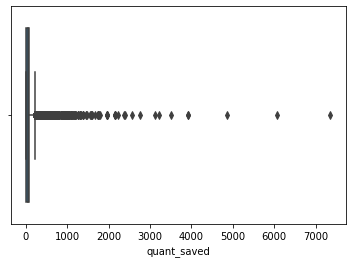

In [ ]:
import seaborn as sns

sns.boxplot(data=df, x=df["quant_saved"])

In [ ]:
q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3-q1

print(f"Q1 - {q1}")
print(f"Q3 - {q3}")
print(f"IQR - {iqr}")

lower_whisker = q1 - 1.5*iqr
upper_whisker = q3 + 1.5*iqr

print(f"Lower Whisker - {lower_whisker}")
print(f"Upper Whisker - {upper_whisker}")

#Creating a new DataFrame
new_df = df[df["quant_saved"] < upper_whisker]

Q1 - 2.2840000000000003
Q3 - 86.514
IQR - 84.22999999999999
Lower Whisker - -124.06099999999998
Upper Whisker - 212.85899999999998


In [ ]:
#Mean, median and mode of savings
all_savings = new_df["quant_saved"].tolist()

print(f"Mean of savings - {statistics.mean(all_savings)}")
print(f"Median of savings - {statistics.median(all_savings)}")
print(f"Mode of savings - {statistics.mode(all_savings)}")
print(f"Standard deviation in savings - {statistics.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()], ["Savings"], show_hist=False)
fig.show()

Mean of savings - 46.200519389818794
Median of savings - 36.0475
Mode of savings - 0.0
Standard deviation in savings - 50.866871917288634


In [ ]:
#Collecting 1000 samples of 100 data points each, saving their averages in a list
import random

sampling_mean_list = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(statistics.mean(temp_list))

mean_sampling = statistics.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

In [ ]:
print(f"Standard deviation of the sampling data - {statistics.stdev(sampling_mean_list)}")

Standard deviation of the sampling data - 5.206759939214692


In [ ]:
print(f"Mean of Population - {statistics.mean(all_savings)}")
print(f"Mean of Sampling Distribution - {mean_sampling}")

Mean of Population - 46.200519389818794
Mean of Sampling Distribution - 46.302106186020396


In [ ]:
#temp_df will have the rows where wealthy is not 0
temp_df = new_df[new_df.wealthy != 0]

wealthy = temp_df["female"].tolist()
savings = temp_df["quant_saved"].tolist()

correlation = np.corrcoef(wealthy, savings)
print(f"Correlation is - {correlation[0,1]}")

Correlation is - -0.0712008152249257


In [ ]:
are_wealthy = new_df.loc[new_df["wealthy"] == 1]
are_not_wealthy = new_df.loc[new_df["wealthy"] == 0]

print(are_wealthy.head())
print(are_not_wealthy.head())

   quant_saved  female  highschool_completed  wealthy
1      39.2724       0                     1        1
3      58.9086       1                     1        1
4      78.5448       1                     1        1
5      39.2724       1                     1        1
6      32.7270       1                     1        1
    quant_saved  female  highschool_completed  wealthy
0     13.090800       1                     0        0
9     52.363200       1                     0        0
14    78.544800       1                     1        0
15    46.152332       1                     1        0
21     2.284000       1                     1        0


In [ ]:
fig = ff.create_distplot([are_wealthy["quant_saved"].tolist()], ["Savings (Not Reminded)"], show_hist=False)
fig.show()

In [ ]:
not_reminded_savings = not_reminded_df["quant_saved"].tolist()

sampling_mean_list_not_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(not_reminded_savings))
  sampling_mean_list_not_reminded.append(statistics.mean(temp_list))

mean_sampling_not_reminded = statistics.mean(sampling_mean_list_not_reminded)
stdev_sampling_not_reminded = statistics.stdev(sampling_mean_list_not_reminded)

print(f"Mean of Sampling (Not Reminded) -> {mean_sampling_not_reminded}")
print(f"Standard Deviation of Sampling (Not Reminded) -> {stdev_sampling_not_reminded}")
fig = ff.create_distplot([sampling_mean_list_not_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Not Reminded) -> 45.28473075763808
Standard Deviation of Sampling (Not Reminded) -> 5.081229415725163


In [ ]:
first_std_deviation_start = mean_sampling_not_reminded-stdev_sampling_not_reminded
first_std_deviation_end = mean_sampling_not_reminded+stdev_sampling_not_reminded
print(f"First (start) - {first_std_deviation_start} and First (end) - {first_std_deviation_end}")

second_std_deviation_start = mean_sampling_not_reminded-(2*stdev_sampling_not_reminded)
second_std_deviation_end = mean_sampling_not_reminded+(2*stdev_sampling_not_reminded)
print(f"Second (start) - {second_std_deviation_start} and Second (end) - {second_std_deviation_end}")

third_std_deviation_start = mean_sampling_not_reminded-(3*stdev_sampling_not_reminded)
third_std_deviation_end = mean_sampling_not_reminded+(3*stdev_sampling_not_reminded)
print(f"Third (start) - {third_std_deviation_start} and Third (end) - {third_std_deviation_end}")

First (start) - 40.20350134191292 and First (end) - 50.36596017336324
Second (start) - 35.12227192618775 and Second (end) - 55.44718958908841
Third (start) - 30.04104251046259 and Third (end) - 60.52841900481357


In [ ]:
reminded_savings = reminded_df["quant_saved"].tolist()

sampling_mean_list_reminded = []
for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(reminded_savings))
  sampling_mean_list_reminded.append(statistics.mean(temp_list))

mean_sampling_reminded = statistics.mean(sampling_mean_list_reminded)
stdev_sampling_reminded = statistics.stdev(sampling_mean_list_reminded)

print(f"Mean of Sampling (Reminded) -> {mean_sampling_reminded}")
print(f"Standard Deviation of Sampling (Reminded) -> {stdev_sampling_reminded}")
fig = ff.create_distplot([sampling_mean_list_reminded], ["Savings (Sampling)"], show_hist=False)
fig.add_trace(go.Scatter(x=[mean_sampling, mean_sampling], y=[0, 0.1], mode="lines", name="MEAN"))
fig.show()

Mean of Sampling (Reminded) -> 48.1649728923615
Standard Deviation of Sampling (Reminded) -> 4.743780130239995


In [ ]:
z_score = (mean_sampling_reminded - mean_sampling_not_reminded) / stdev_sampling_not_reminded
print(f"Z-Score is - {z_score}")

Z-Score is - 0.5300681321758159
